In [1]:
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
mnist_testset = datasets.MNIST(root='./data', train = False, download = True, transform = None)

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train = True, download = True, transform = None)

In [4]:
mnist_trainset[0][0]

In [5]:
from torchvision.transforms import ToTensor
def split(dataset):
    x = []
    y = []
    for i in range(len(dataset)):
        x.append(ToTensor()(dataset[i][0]))
        y.append(dataset[i][1])
    return x, y

In [6]:
train_pic, train_target = split(mnist_trainset)
test_pic, test_target = split(mnist_testset)

In [7]:
def convert(x):
    for i in range (len(x)):
        x[i] = x[i].numpy()
        x[i] = x[i].reshape(28 * 28)
    return x

In [8]:
train_pic = convert(train_pic)
test_pic = convert(test_pic)
train_target = np.array(train_target)
test_target = np.array(test_target)

In [9]:
#pca = PCA()
pca = PCA(n_components = 28*28)

In [10]:
pca.fit(train_pic)

PCA(n_components=784)

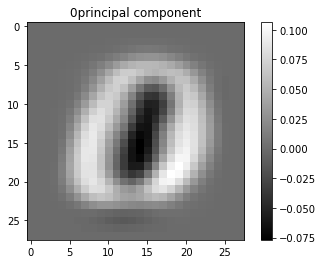

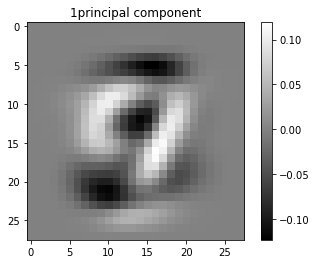

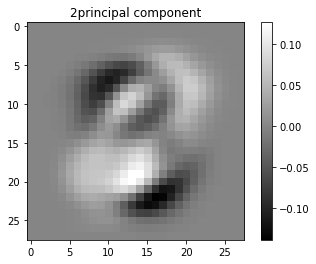

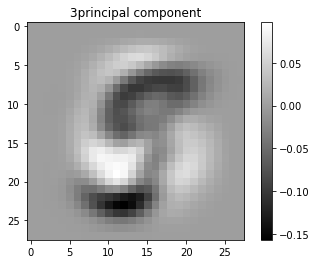

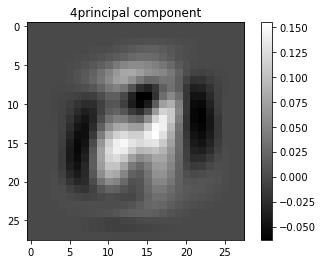

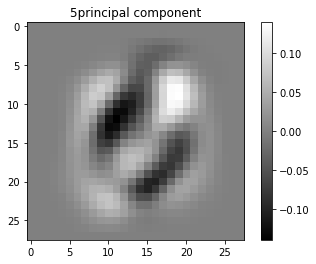

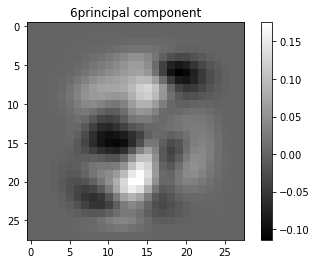

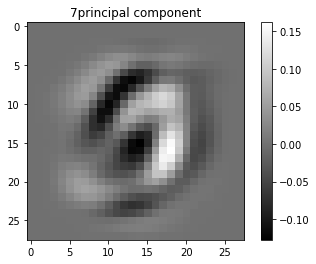

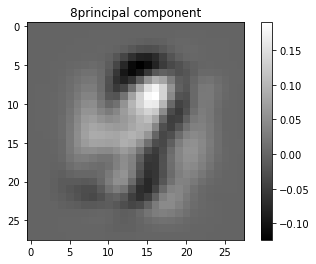

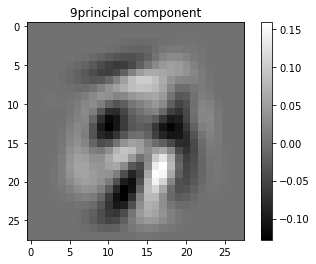

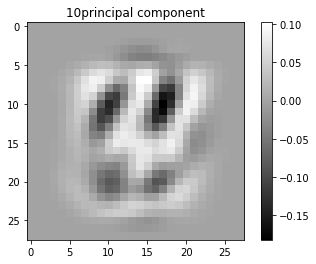

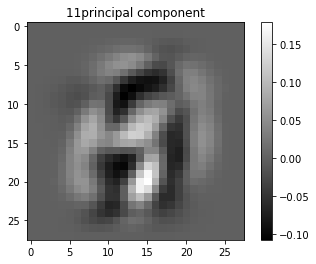

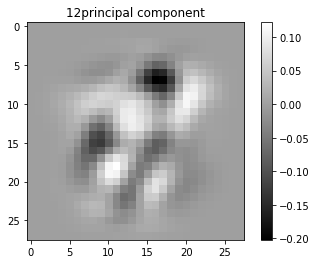

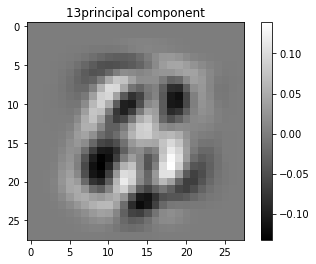

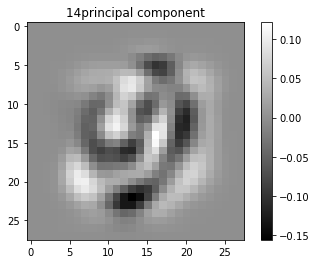

In [11]:
for i in range(15):
    plt.imshow(pca.components_[i, :].reshape(28, 28), cmap="gray")
    plt.colorbar()
    plt.title(f"{i}principal component")
    plt.show()

In [12]:
pca.explained_variance_ratio_[1]

0.07095924074799966

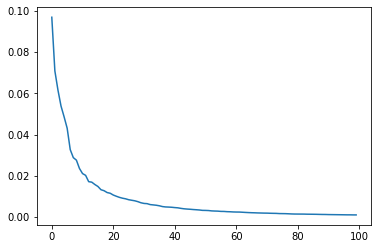

In [13]:
plt.plot(pca.explained_variance_ratio_[:100])

In [14]:
pca = PCA(n_components = 2)
pca.fit(train_pic)
tmp = pca.transform(train_pic)

In [15]:
len(tmp)

60000

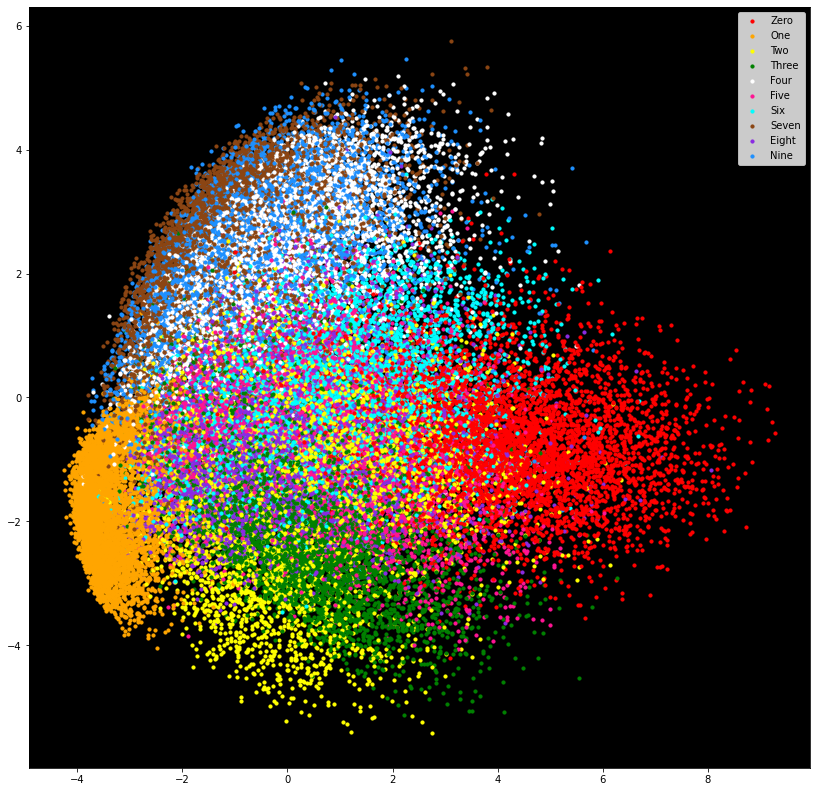

In [16]:
fig, ax = plt.subplots()
ax.set_facecolor('black')
fig.set_figwidth(14)
fig.set_figheight(14)
for i in range(len(tmp)):
    if train_target[i] == 0:
        zero = plt.scatter(tmp[i][0], tmp[i][1], color = "red", s = 10)
    elif train_target[i] == 1:
        one = plt.scatter(tmp[i][0], tmp[i][1], color = "orange", s = 10)
    elif train_target[i] == 2:
        two = plt.scatter(tmp[i][0], tmp[i][1], color = "yellow", s = 10)
    elif train_target[i] == 3:
        three = plt.scatter(tmp[i][0], tmp[i][1], color = "green", s = 10)
    elif train_target[i] == 4:
        four = plt.scatter(tmp[i][0], tmp[i][1], color = "white", s = 10)
    elif train_target[i] == 5:
        five = plt.scatter(tmp[i][0], tmp[i][1], color = "deeppink", s = 10)
    elif train_target[i] == 6:
        six = plt.scatter(tmp[i][0], tmp[i][1], color = "aqua", s = 10)
    elif train_target[i] == 7:
        seven = plt.scatter(tmp[i][0], tmp[i][1], color = "saddlebrown", s = 10)
    elif train_target[i] == 8:
        eight = plt.scatter(tmp[i][0], tmp[i][1], color = "blueviolet", s = 10)
    elif train_target[i] == 9:
        nine = plt.scatter(tmp[i][0], tmp[i][1], color = "dodgerblue", s = 10)
        
plt.legend((zero, one, two, three, four, five, six, seven, eight, nine),
          ('Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven',
          'Eight', 'Nine'))
        

In [17]:
tmp[0][0]

0.48601012377804725